In [538]:
import pandas as pd
import matplotlib.pyplot as plt

In [539]:
df = pd.read_excel('./../../privileged_data/movements_data2.xlsx')
df.head()

,Según un período,Cuentas,Categoría,Sub-categoría,Nota,MXN,Ingreso/Gasto,Lista,Importe,Ajustes de,Cuentas.1
0,2023-08-21 13:22:09,BNX - Mi cuenta,Libreton BBVA,NaN,Transferencia para pago,1100.00,Ingreso transportado,NaN,1100.00,MXN,1100.00
1,2023-08-21 13:22:09,Libreton BBVA,BNX - Mi cuenta,NaN,Transferencia para pago,1100.00,Retiro transportado,NaN,1100.00,MXN,1100.00
2,2023-08-21 10:51:55,BNX - Rewards,BNX - Mi cuenta,NaN,Pago TDC,28278.68,Ingreso transportado,NaN,28278.68,MXN,28278.68
3,2023-08-21 10:51:55,BNX - Mi cuenta,BNX - Rewards,NaN,Pago TDC,28278.68,Retiro transportado,NaN,28278.68,MXN,28278.68
4,2023-08-21 10:50:34,BNX - Mi cuenta,BNX - Viajes,NaN,Transferencia para pago,1231.00,Ingreso transportado,NaN,1231.00,MXN,1231.00


In [540]:
# Getting all the unique accounts
df['Cuentas'].unique()

array(['BNX - Mi cuenta', 'Libreton BBVA', 'BNX - Rewards',
       'BNX - Viajes', 'BNX - Ahorro fácil', 'BNX - Priority ',
       'Nu - Moradita', 'Cash', 'BBVA - Azul', 'BNX - Costco', 'DINN',
       'Vales de despensa', 'Allianz - 87', 'Allianz - 86', 'Fintual',
       'Cuenta Nu', 'Scotiabank', 'Crédito Auto', 'Efectivo Casa',
       'Cetes', 'GBM - Smart cash', 'BNX - Pagare', 'Terreno Merida',
       'GBM - Acciones USA', 'GBM - Acciones'], dtype=object)

In [541]:
#Generating a dict classifying the accounts by type

accounts = [
    ('Nu - Moradita', 'tdc'),
    ('Allianz - 87', 'investment'),
    ('Allianz - 86', 'investment'),
    ('Cash', 'cash'),
    ('Cetes', 'investment'),
    ('GBM - Smart cash', 'investment'),
    ('Fintual', 'investment'),
    ('Cuenta Nu', 'savings'),
    ('DINN', 'savings'),
    ('BNX - Pagare', 'investment'),
    ('BNX - Viajes', 'investment'),
    ('BNX - Rewards', 'tdc'),
    ('Efectivo Casa', 'cash'),
    ('Libreton BBVA', 'debit'),
    ('Scotiabank', 'debit'),
    ('BNX - Priority', 'debit'),
    ('BNX - Mi cuenta', 'debit'),
    ('BNX - Ahorro fácil', 'savings'),
    ('Terreno Merida', 'loan'),
    ('BNX - Costco', 'tdc'),
    ('Vales de despensa', 'cash'),
    ('BBVA - Azul', 'tdc'),
    ('Crédito Auto', 'loan'),
    ('GBM - Acciones USA', 'investment'),
    ('GBM - Acciones', 'investment')
]

# Generate a dimension table for the accounts and their types
accounts_df = pd.DataFrame(accounts, columns=['account', 'account_type'])
accounts_df['account_id'] = accounts_df.index + 1

# Sort columns
accounts_df = accounts_df[['account_id', 'account', 'account_type']]
accounts_df


,account_id,account,account_type
0,1,Nu - Moradita,tdc
1,2,Allianz - 87,investment
2,3,Allianz - 86,investment
3,4,Cash,cash
4,5,Cetes,investment
5,6,GBM - Smart cash,investment
6,7,Fintual,investment
7,8,Cuenta Nu,savings
8,9,DINN,savings
9,10,BNX - Pagare,investment


In [542]:
# Original columns:
# Según un período	Cuentas	Categoría	Sub-categoría	Nota	MXN	Ingreso/Gasto	Lista	Importe	Ajustes de	Cuentas.1

# New columns:
# date, account, category, note, amount, income/expense, amount

# Generate new df with only the columns we need
movements_df = pd.DataFrame(df, columns=['Según un período', 'Cuentas', 'Categoría', 'Nota', 'Lista', 'Ingreso/Gasto', 'Importe'])

# Rename columns
movements_df.columns = ['date', 'account', 'category', 'note', 'description','income/expense', 'amount']
movements_df.tail(100)

,date,account,category,note,description,income/expense,amount
988,2023-05-15 20:35:49,Libreton BBVA,BNX - Mi cuenta,Transferencia para pago,NaN,Retiro transportado,1102.61
989,2023-05-15 20:35:49,BBVA - Azul,Libreton BBVA,Pago TDC,NaN,Ingreso transportado,7602.00
990,2023-05-15 20:35:49,Libreton BBVA,BBVA - Azul,Pago TDC,NaN,Retiro transportado,7602.00
991,2023-05-15 20:35:49,Libreton BBVA,🤑 Allowance,Devolución SAT,NaN,Ingreso,8824.00
992,2023-05-15 20:35:49,BNX - Mi cuenta,León,Pal Leon,NaN,Gasto,120.00
...,...,...,...,...,...,...,...
1083,2023-04-30 18:23:13,Scotiabank,Account base,NaN,NaN,Ingreso,72563.87
1084,2023-04-30 18:22:10,DINN,Account base,NaN,NaN,Ingreso,62749.49
1085,2023-04-30 18:20:52,GBM - Acciones USA,Account base,NaN,NaN,Ingreso,443.00
1086,2023-04-30 18:19:08,GBM - Smart cash,Account base,NaN,NaN,Ingreso,48663.94


In [543]:
#Generating category dimension table from the movements_df

categories_df = movements_df[['category']].drop_duplicates().reset_index()
categories_df['category_id'] = categories_df.index + 1
categories_df = categories_df[['category_id', 'category']]
categories_df.head()

,category_id,category
0,1,Libreton BBVA
1,2,BNX - Mi cuenta
2,3,BNX - Rewards
3,4,BNX - Viajes
4,5,BNX - Ahorro fácil


In [544]:
# Substitute category in movements_df with category_id in categories_df

def get_category_id(category):
    return categories_df[categories_df['category'] == category]['category_id'].values[0]

movements_df['category_id'] = movements_df['category'].apply(get_category_id)
movements_df.drop('category', axis=1, inplace=True)
movements_df.head(20)

,date,account,note,description,income/expense,amount,category_id
0,2023-08-21 13:22:09,BNX - Mi cuenta,Transferencia para pago,NaN,Ingreso transportado,1100.00,1
1,2023-08-21 13:22:09,Libreton BBVA,Transferencia para pago,NaN,Retiro transportado,1100.00,2
2,2023-08-21 10:51:55,BNX - Rewards,Pago TDC,NaN,Ingreso transportado,28278.68,2
3,2023-08-21 10:51:55,BNX - Mi cuenta,Pago TDC,NaN,Retiro transportado,28278.68,3
4,2023-08-21 10:50:34,BNX - Mi cuenta,Transferencia para pago,NaN,Ingreso transportado,1231.00,4
5,2023-08-21 10:50:34,BNX - Viajes,Transferencia para pago,NaN,Retiro transportado,1231.00,2
6,2023-08-21 10:50:13,BNX - Mi cuenta,Transferencia para pago,NaN,Ingreso transportado,2000.00,5
7,2023-08-21 10:50:13,BNX - Ahorro fácil,Transferencia para pago,NaN,Retiro transportado,2000.00,2
8,2023-08-21 10:47:35,BNX - Mi cuenta,Transferencia para pago,NaN,Ingreso transportado,2331.09,6
9,2023-08-21 10:47:35,BNX - Priority,Transferencia para pago,NaN,Retiro transportado,2331.09,2


In [545]:
accounts_df[accounts_df['account'] == 'BNX - Priority']['account_id'].values[0]

16

In [546]:
# Substitute account in movements_df with account_id in accounts_df

def get_account_id(account):
    value = None
    try:
        value = accounts_df[accounts_df['account'] == account.strip()]['account_id'].values[0]
    except:
        print(f'Account {account} not found in accounts_df')
    return value

movements_df['account_id'] = movements_df['account'].apply(get_account_id)
#movements_df.drop('account', axis=1, inplace=True)
movements_df

,date,account,note,description,income/expense,amount,category_id,account_id
0,2023-08-21 13:22:09,BNX - Mi cuenta,Transferencia para pago,NaN,Ingreso transportado,1100.00,1,17
1,2023-08-21 13:22:09,Libreton BBVA,Transferencia para pago,NaN,Retiro transportado,1100.00,2,14
2,2023-08-21 10:51:55,BNX - Rewards,Pago TDC,NaN,Ingreso transportado,28278.68,2,12
3,2023-08-21 10:51:55,BNX - Mi cuenta,Pago TDC,NaN,Retiro transportado,28278.68,3,17
4,2023-08-21 10:50:34,BNX - Mi cuenta,Transferencia para pago,NaN,Ingreso transportado,1231.00,4,17
...,...,...,...,...,...,...,...,...
1083,2023-04-30 18:23:13,Scotiabank,NaN,NaN,Ingreso,72563.87,59,15
1084,2023-04-30 18:22:10,DINN,NaN,NaN,Ingreso,62749.49,59,9
1085,2023-04-30 18:20:52,GBM - Acciones USA,NaN,NaN,Ingreso,443.00,59,24
1086,2023-04-30 18:19:08,GBM - Smart cash,NaN,NaN,Ingreso,48663.94,59,6


In [547]:
# Plot how much money was spent on Caf'e peer week

coffee_cat_id = categories_df.loc[categories_df['category'] == '☕️ Café']['category_id'].values[0]
coffee_cat_id

# Get all movements for the coffee category
coffee_movements = movements_df.loc[movements_df['category_id'] == coffee_cat_id]
coffee_movements


,date,account,note,description,income/expense,amount,category_id,account_id
42,2023-08-17 20:00:28,Cash,Amuleto 17,NaN,Gasto,225.00,21,4
65,2023-08-14 23:29:47,Cash,Cafetería,NaN,Gasto,55.00,21,4
92,2023-08-13 15:18:34,BNX - Rewards,Nespresso,10 paquetes de cápsulas,Gasto,1775.00,21,12
100,2023-08-12 21:43:43,BNX - Rewards,Punta de cielo,NaN,Gasto,64.00,21,12
115,2023-08-11 21:59:27,BNX - Rewards,Starbucks,NaN,Gasto,86.00,21,12
157,2023-08-05 23:30:45,Cash,Entre piedras,NaN,Gasto,60.00,21,4
167,2023-08-04 17:00:30,BNX - Rewards,Entre piedras,NaN,Gasto,200.00,21,12
243,2023-07-29 17:54:43,BNX - Rewards,Starbucks,NaN,Gasto,558.00,21,12
259,2023-07-28 18:17:07,Cash,Cafés feos,NaN,Gasto,240.00,21,4
283,2023-07-25 18:14:55,BNX - Rewards,Starbucks,NaN,Gasto,191.00,21,12


/var/folders/29/cw5vz9nx5c336rnr5t3xbzgh0000gn/T/ipykernel_36485/1160035406.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(total_per_note.index, rotation=90)


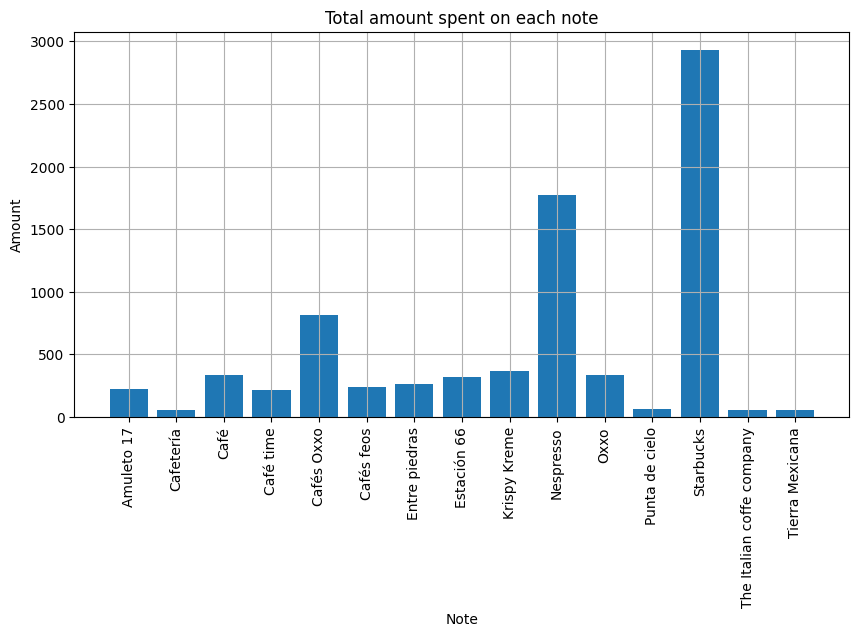

In [548]:
#plot a pie chart with the total amount spent on each note
grouped_by_note = coffee_movements.groupby('note')
total_per_note = grouped_by_note['amount'].sum()

# Plot a bar chart with the total amount spent on each note
figure = plt.figure(figsize=(10, 5))
axes = figure.add_subplot(1, 1, 1)
axes.bar(total_per_note.index, total_per_note.values)
axes.set_title('Total amount spent on each note')
axes.set_xlabel('Note')
axes.set_ylabel('Amount')
axes.set_xticklabels(total_per_note.index, rotation=90)
axes.grid()

In [549]:
scotia_movements = movements_df.loc[movements_df['account_id'] == 15]
scotia_movements

,date,account,note,description,income/expense,amount,category_id,account_id
78,2023-08-14 16:30:46,Scotiabank,Por si las dudas,NaN,Retiro transportado,28856.73,1,15
79,2023-08-14 16:28:27,Scotiabank,NaN,NaN,Ingreso,31856.73,29,15
82,2023-08-14 10:58:26,Scotiabank,Quincena papás,NaN,Gasto,3000.00,25,15
210,2023-07-31 15:45:46,Scotiabank,Transferencia para retiro,NaN,Retiro transportado,5000.00,1,15
216,2023-07-31 11:11:37,Scotiabank,Transferencia para pago,NaN,Retiro transportado,1300.00,27,15
...,...,...,...,...,...,...,...,...
1017,2023-05-12 20:24:14,Scotiabank,NaN,Transferencia para casa,Retiro transportado,7500.00,1,15
1028,2023-05-11 21:59:17,Scotiabank,Gastos varios cada,NaN,Gasto,19060.00,22,15
1029,2023-05-11 20:17:25,Scotiabank,Transferencia para casa,NaN,Ingreso transportado,20000.00,2,15
1040,2023-05-10 20:07:38,Scotiabank,Transferencia para pago,NaN,Retiro transportado,439.00,2,15


/var/folders/29/cw5vz9nx5c336rnr5t3xbzgh0000gn/T/ipykernel_36485/1561447360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_movements['date'] = pd.to_datetime(coffee_movements['date'])


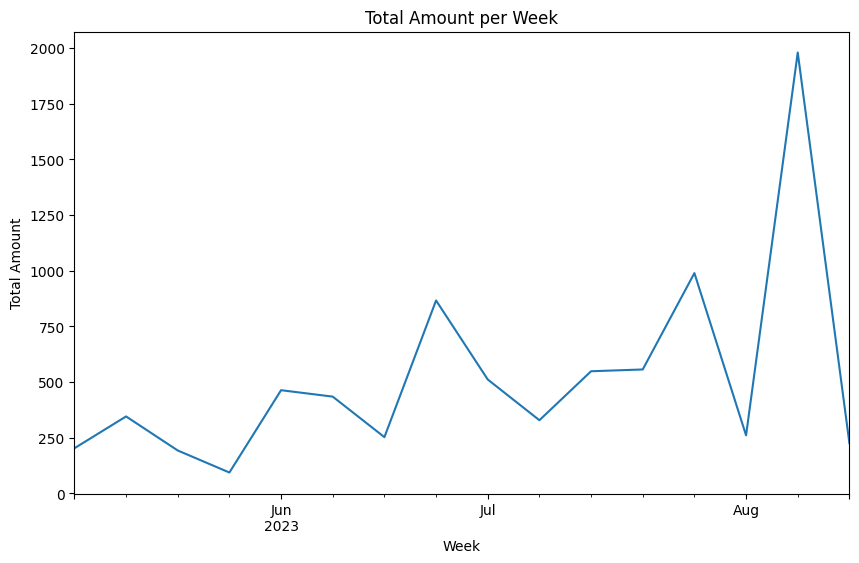

In [550]:
# Convert the date column to a datetime object
coffee_movements['date'] = pd.to_datetime(coffee_movements['date'])

# Group the DataFrame by week and sum the amount column
weekly_totals = coffee_movements.groupby(pd.Grouper(key='date', freq='W-MON'))['amount'].sum()

# Create a line plot of the weekly totals
weekly_totals.plot(kind='line', figsize=(10, 6))

# Add labels and a title to the plot
plt.xlabel('Week')
plt.ylabel('Total Amount')
plt.title('Total Amount per Week')
plt.show()

In [551]:
# Convert the date column to a date object using dt.date
movements_df['date'] = pd.to_datetime(movements_df['date']).dt.date

# Map the 'Gasto' values to negative numbers
movements_df.loc[movements_df['income/expense'].isin(['Gasto', 'Retiro transportado']), 'amount'] *= -1

# Create a new DataFrame with the total amount per day for each account
account_totals = movements_df.groupby(['date', 'account_id'])['amount'].sum().unstack()

# Replace NaN values with 0
account_totals.fillna(0, inplace=True)

# Sort the DataFrame by date
account_totals.sort_index(inplace=True)

# Map the account_id values to account_name values
# account_totals.columns = accounts_df.set_index('account_id').loc[account_totals.columns, 'account']

# Iterate over the columns and calculate the historical record for each account
for col in account_totals.columns:
    account_totals[col] = account_totals[col].cumsum()

# Display the resulting DataFrame
account_totals.head()

account_id,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
date,,,,,,,,,,,,,,,,,,,,,
2023-04-30,32000.0,31103.58,31050.75,0.0,2341.74,48663.94,6823.1,0.0,62749.49,1027.0,...,0.0,0.00,0.0,-31800.0,33000.0,0.0,71933.00,-141213.64,443.0,33089.29
2023-05-01,32000.0,31103.58,31050.75,0.0,2341.74,48663.94,6823.1,0.0,62749.49,1027.0,...,0.0,12719.62,0.0,-31800.0,33000.0,0.0,71933.00,-141213.64,443.0,33089.29
2023-05-03,32000.0,31103.58,31050.75,0.0,2341.74,48663.94,6823.1,0.0,62749.49,1027.0,...,0.0,12719.62,0.0,-31800.0,33000.0,0.0,71933.00,-141213.64,443.0,33089.29
2023-05-05,32000.0,31103.58,31050.75,-199.5,2341.74,48663.94,6823.1,0.0,62749.49,1027.0,...,0.0,12719.62,0.0,-31800.0,33000.0,0.0,71933.00,-141213.64,443.0,33089.29
2023-05-06,32000.0,31103.58,31050.75,-199.5,2341.74,48663.94,6823.1,0.0,62749.49,1027.0,...,0.0,11219.62,0.0,-31800.0,33000.0,0.0,70936.37,-141213.64,443.0,33089.29


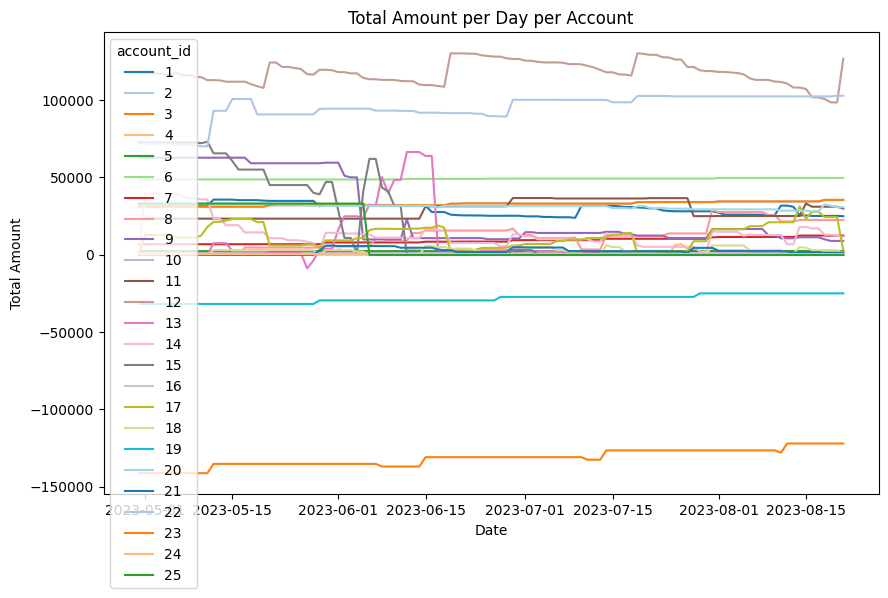

In [552]:
# Create a line plot of the account totals
account_totals.plot(kind='line', figsize=(10, 6))

# Add labels and a title to the plot
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.title('Total Amount per Day per Account')
plt.show()

In [553]:
movements_df = movements_df.merge(
    accounts_df[['account_id', 'account_type']],
    on='account_id',
    how='left'
)

movements_df.head()

,date,account,note,description,income/expense,amount,category_id,account_id,account_type
0,2023-08-21,BNX - Mi cuenta,Transferencia para pago,NaN,Ingreso transportado,1100.00,1,17,debit
1,2023-08-21,Libreton BBVA,Transferencia para pago,NaN,Retiro transportado,-1100.00,2,14,debit
2,2023-08-21,BNX - Rewards,Pago TDC,NaN,Ingreso transportado,28278.68,2,12,tdc
3,2023-08-21,BNX - Mi cuenta,Pago TDC,NaN,Retiro transportado,-28278.68,3,17,debit
4,2023-08-21,BNX - Mi cuenta,Transferencia para pago,NaN,Ingreso transportado,1231.00,4,17,debit


In [554]:
historical_by_account_type = movements_df.groupby(['date', 'account_type'])['amount'].sum().unstack().fillna(0)
historical_by_account_type.sort_index(inplace=True)
historical_by_account_type.head()

account_type,cash,debit,investment,loan,savings,tdc
date,,,,,,
2023-04-30,0.0,72563.87,177882.34,-173013.64,62749.49,254353.58
2023-05-01,0.0,52363.62,0.00,0.00,0.00,0.00
2023-05-03,0.0,0.00,0.00,0.00,0.00,-329.00
2023-05-05,-199.5,-300.00,0.00,0.00,0.00,-781.80
2023-05-06,0.0,-1500.00,0.00,0.00,0.00,243.37


In [555]:
for col in historical_by_account_type.columns:
    historical_by_account_type[col] = historical_by_account_type[col].cumsum()

# Display the resulting DataFrame
historical_by_account_type['loan'] = historical_by_account_type['loan'] * -1
historical_by_account_type.head()

account_type,cash,debit,investment,loan,savings,tdc
date,,,,,,
2023-04-30,0.0,72563.87,177882.34,173013.64,62749.49,254353.58
2023-05-01,0.0,124927.49,177882.34,173013.64,62749.49,254353.58
2023-05-03,0.0,124927.49,177882.34,173013.64,62749.49,254024.58
2023-05-05,-199.5,124627.49,177882.34,173013.64,62749.49,253242.78
2023-05-06,-199.5,123127.49,177882.34,173013.64,62749.49,253486.15


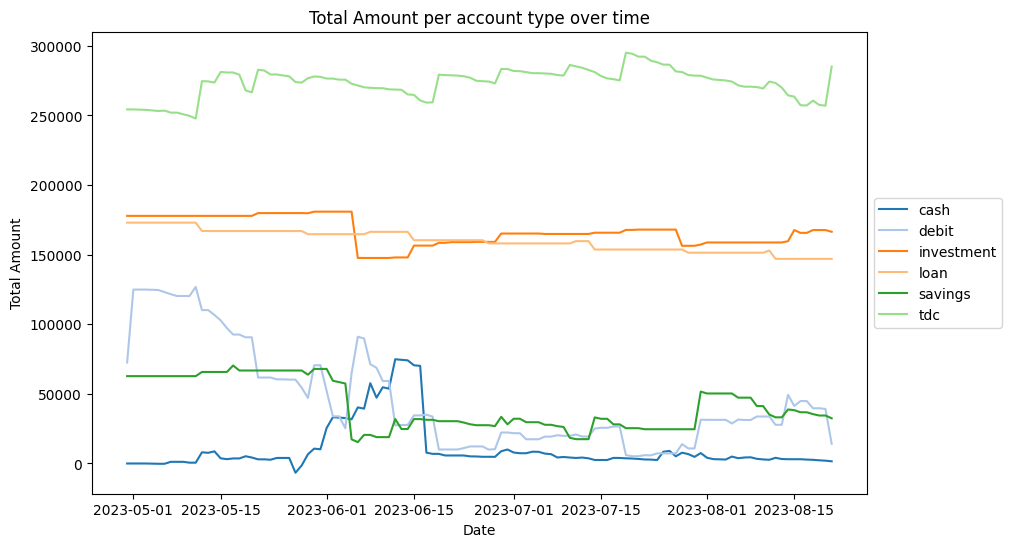

In [556]:
# Create a line plot of the account totals
historical_by_account_type.plot(kind='line', figsize=(10, 6))

# Add labels and a title to the plot
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.title('Total Amount per account type over time')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [557]:
tdc_accounts = accounts_df[accounts_df['account_type'] == 'tdc']
tdc_accounts_ids = tdc_accounts['account_id'].unique()
tdc_accounts_ids

array([ 1, 12, 20, 22])

In [558]:
def get_account_name(row):
    return accounts_df[accounts_df['account_id'] == row]['account'].values[0]

tdc_movements = movements_df.loc[movements_df['account_type'] == 'tdc']
tdc_movements['account'] = tdc_movements['account_id'].apply(get_account_name)
tdc_movements

/var/folders/29/cw5vz9nx5c336rnr5t3xbzgh0000gn/T/ipykernel_36485/1718788491.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdc_movements['account'] = tdc_movements['account_id'].apply(get_account_name)


,date,account,note,description,income/expense,amount,category_id,account_id,account_type
2,2023-08-21,BNX - Rewards,Pago TDC,NaN,Ingreso transportado,28278.68,2,12,tdc
10,2023-08-21,Nu - Moradita,GitHub,NaN,Gasto,-170.48,7,1,tdc
13,2023-08-20,BBVA - Azul,Pago TDC,NaN,Ingreso transportado,395.10,1,22,tdc
17,2023-08-20,BNX - Costco,Congelados,NaN,Gasto,-941.00,13,20,tdc
20,2023-08-19,BNX - Costco,35 Lts,NaN,Gasto,-846.65,15,20,tdc
...,...,...,...,...,...,...,...,...,...
1074,2023-04-30,BBVA - Azul,NaN,NaN,Gasto,-30767.00,62,22,tdc
1075,2023-04-30,BBVA - Azul,Ingresos,NaN,Ingreso,102700.00,8,22,tdc
1076,2023-04-30,BNX - Costco,Ingresos,NaN,Ingreso,33000.00,8,20,tdc
1077,2023-04-30,BNX - Rewards,NaN,NaN,Gasto,-15079.42,62,12,tdc


<Axes: title={'center': 'Number of movements per account'}>

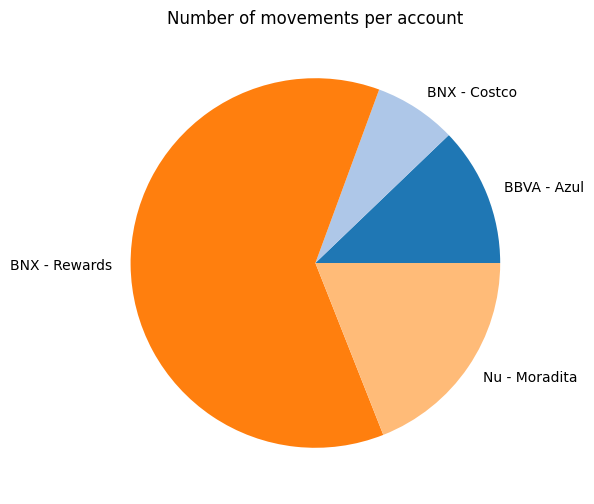

In [559]:
tdc_movements.groupby('account').size().plot(kind='pie', figsize=(12, 6), title='Number of movements per account')

In [560]:
# Create a new DataFrame with the total amount per day for each account
active_accounts = movements_df[~movements_df['account_id'].isin([18, 22])]
account_totals = active_accounts.groupby(['date', 'account_id'])['amount'].sum().unstack()


# Replace NaN values with 0
account_totals.fillna(0, inplace=True)

# Sort the DataFrame by date
account_totals.sort_index(inplace=True)

# Map the account_id values to account_name values
account_totals.columns = accounts_df.set_index('account_id').loc[account_totals.columns, 'account']

# Print the resulting DataFrame
print(account_totals)

account     Nu - Moradita  Allianz - 87  Allianz - 86   Cash    Cetes   
date                                                                    
2023-04-30       32000.00      31103.58      31050.75    0.0  2341.74  \
2023-05-01           0.00          0.00          0.00    0.0     0.00   
2023-05-03           0.00          0.00          0.00    0.0     0.00   
2023-05-05           0.00          0.00          0.00 -199.5     0.00   
2023-05-06           0.00          0.00          0.00    0.0     0.00   
...                   ...           ...           ...    ...      ...   
2023-08-17           0.00          0.00          0.00 -250.0     0.00   
2023-08-18           0.00       1000.00       1000.00  -50.0     0.00   
2023-08-19           0.00          0.00          0.00 -335.0     0.00   
2023-08-20           0.00          0.00          0.00 -268.0     0.00   
2023-08-21        -170.48          0.00          0.00 -451.0     0.00   

account     GBM - Smart cash  Fintual  Cuenta Nu  

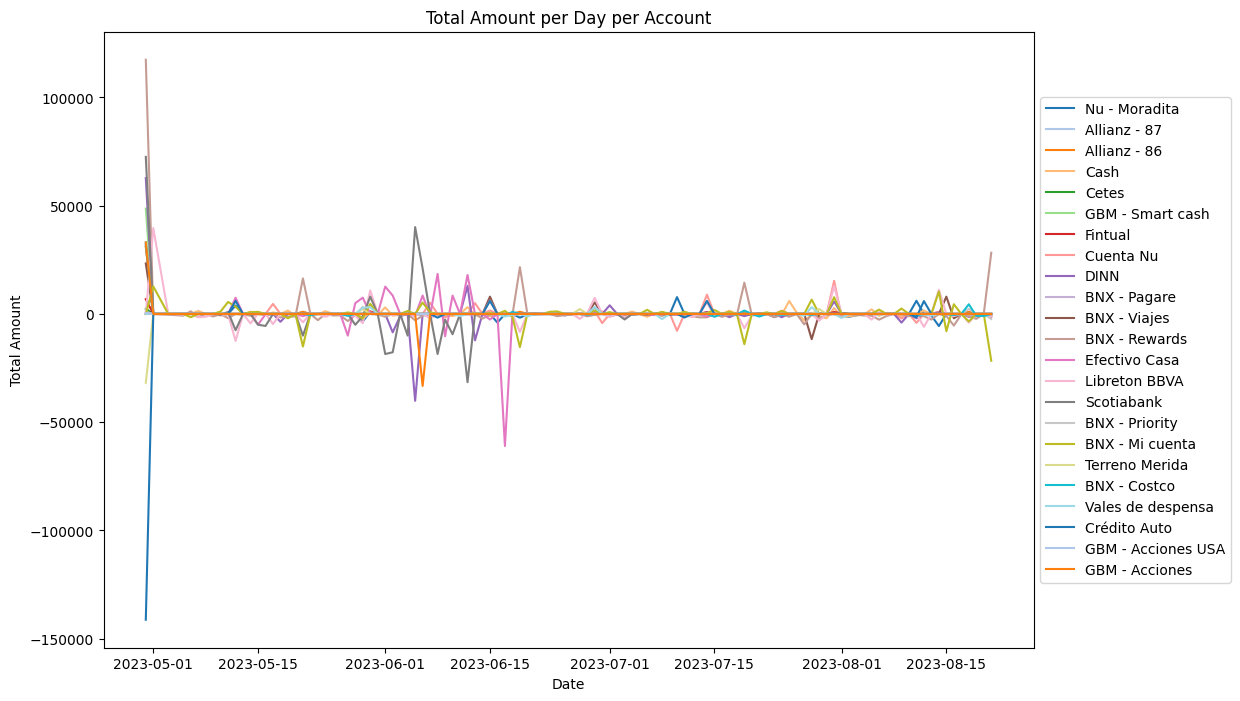

In [561]:
import matplotlib as mpl
# Create a custom color cycle with 20 colors from the tab20 color palette
colors = mpl.cm.tab20.colors
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colors)

# Create a line plot of the account totals
account_totals.plot(figsize=(12, 8))

# Add labels and a title to the plot
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.title('Total Amount per Day per Account')

# Move the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

In [562]:
movements_df

,date,account,note,description,income/expense,amount,category_id,account_id,account_type
0,2023-08-21,BNX - Mi cuenta,Transferencia para pago,NaN,Ingreso transportado,1100.00,1,17,debit
1,2023-08-21,Libreton BBVA,Transferencia para pago,NaN,Retiro transportado,-1100.00,2,14,debit
2,2023-08-21,BNX - Rewards,Pago TDC,NaN,Ingreso transportado,28278.68,2,12,tdc
3,2023-08-21,BNX - Mi cuenta,Pago TDC,NaN,Retiro transportado,-28278.68,3,17,debit
4,2023-08-21,BNX - Mi cuenta,Transferencia para pago,NaN,Ingreso transportado,1231.00,4,17,debit
...,...,...,...,...,...,...,...,...,...
1083,2023-04-30,Scotiabank,NaN,NaN,Ingreso,72563.87,59,15,debit
1084,2023-04-30,DINN,NaN,NaN,Ingreso,62749.49,59,9,savings
1085,2023-04-30,GBM - Acciones USA,NaN,NaN,Ingreso,443.00,59,24,investment
1086,2023-04-30,GBM - Smart cash,NaN,NaN,Ingreso,48663.94,59,6,investment


In [563]:
expend_movements = movements_df[movements_df['account_type'].isin(['debit', 'cash', 'tdc'])]
expend_movements = expend_movements[movements_df['income/expense']=='Gasto']
expend_movements['amount'] = expend_movements['amount'] * -1
category_totals = expend_movements.groupby(['date', 'category_id'])['amount'].sum().unstack()


# Replace NaN values with 0
category_totals.fillna(0, inplace=True)

# Sort the DataFrame by date
category_totals.sort_index(inplace=True)

# Map the account_id values to account_name values
category_totals.columns = categories_df.set_index('category_id').loc[category_totals.columns, 'category']

# Print the resulting DataFrame
print(category_totals)

category    Servicios online  Modificar saldo  🎁 Gift  🍟 Snacks  Restaurantes   
date                                                                            
2023-04-30              0.00              0.0     0.0       0.0           0.0  \
2023-05-03              0.00              0.0     0.0       0.0           0.0   
2023-05-05              0.00              0.0     0.0      79.5         781.8   
2023-05-06             50.00              0.0     0.0     210.0           0.0   
2023-05-07              0.00              0.0   100.0       0.0        1244.1   
...                      ...              ...     ...       ...           ...   
2023-08-17              0.00              0.0     0.0      25.0           0.0   
2023-08-18              0.00              0.0     0.0     138.0        1047.0   
2023-08-19           1100.00              0.0  1000.0       0.0        1149.5   
2023-08-20              0.00              0.0   100.0      68.0         200.0   
2023-08-21            170.48

/var/folders/29/cw5vz9nx5c336rnr5t3xbzgh0000gn/T/ipykernel_36485/850223768.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  expend_movements = expend_movements[movements_df['income/expense']=='Gasto']


/var/folders/29/cw5vz9nx5c336rnr5t3xbzgh0000gn/T/ipykernel_36485/3840951407.py:12: UserWarning: Glyph 127873 (\N{WRAPPED PRESENT}) missing from current font.
  plt.tight_layout()
/var/folders/29/cw5vz9nx5c336rnr5t3xbzgh0000gn/T/ipykernel_36485/3840951407.py:12: UserWarning: Glyph 127839 (\N{FRENCH FRIES}) missing from current font.
  plt.tight_layout()
/var/folders/29/cw5vz9nx5c336rnr5t3xbzgh0000gn/T/ipykernel_36485/3840951407.py:12: UserWarning: Glyph 127836 (\N{STEAMING BOWL}) missing from current font.
  plt.tight_layout()
/var/folders/29/cw5vz9nx5c336rnr5t3xbzgh0000gn/T/ipykernel_36485/3840951407.py:12: UserWarning: Glyph 129496 (\N{PERSON IN LOTUS POSITION}) missing from current font.
  plt.tight_layout()
/var/folders/29/cw5vz9nx5c336rnr5t3xbzgh0000gn/T/ipykernel_36485/3840951407.py:12: UserWarning: Glyph 127996 (\N{EMOJI MODIFIER FITZPATRICK TYPE-3}) missing from current font.
  plt.tight_layout()
/var/folders/29/cw5vz9nx5c336rnr5t3xbzgh0000gn/T/ipykernel_36485/3840951407.py:12: 

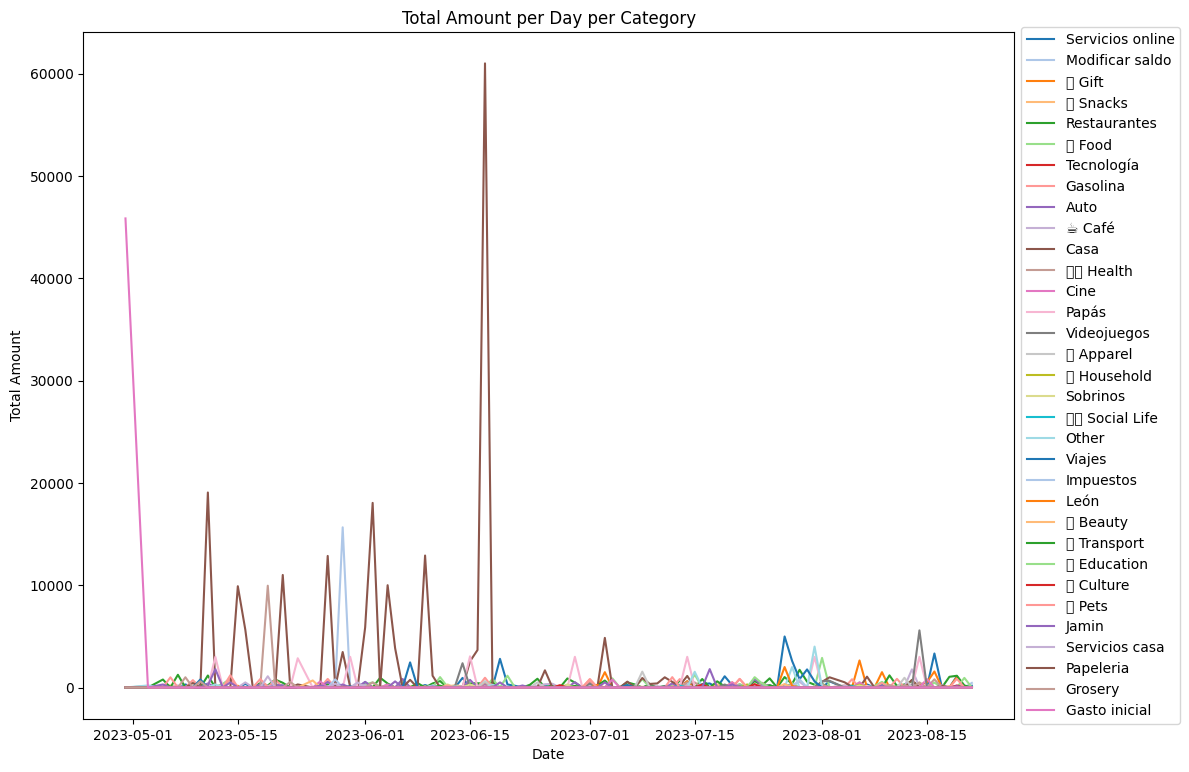

In [564]:
# Create a line plot of all columns in the category_totals DataFrame
category_totals.plot(figsize=(12, 8))

# Add labels and a title to the plot
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.title('Total Amount per Day per Category')

# Move the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.tight_layout()
plt.show()



In [565]:
gas_cat_id = categories_df.loc[categories_df['category'] == 'Gasolina']['category_id'].values[0]
print(gas_cat_id)

gas_movements = movements_df.loc[movements_df['category_id'] == gas_cat_id]
gas_movements

15


,date,account,note,description,income/expense,amount,category_id,account_id,account_type
20,2023-08-19,BNX - Costco,35 Lts,NaN,Gasto,-846.65,15,20,tdc
114,2023-08-11,BNX - Costco,35 lts,NaN,Gasto,-846.65,15,20,tdc
128,2023-08-09,Cash,20Lts,Camioneta,Gasto,-450.00,15,4,cash
164,2023-08-05,BNX - Rewards,33.131,Gasolinera Joco,Gasto,-808.07,15,12,tdc
313,2023-07-21,BNX - Costco,35 lts,NaN,Gasto,-846.65,15,20,tdc
418,2023-07-13,BNX - Rewards,35 Lts,NaN,Gasto,-825.65,15,12,tdc
513,2023-07-01,BNX - Rewards,Gasolina,35 lts,Gasto,-834.00,15,12,tdc
650,2023-06-17,BNX - Costco,Gasolina,NaN,Gasto,-955.60,15,20,tdc
913,2023-05-27,BNX - Costco,Gasolina,35 Lts,Gasto,-839.65,15,20,tdc
951,2023-05-20,BNX - Rewards,Gasolina,30 Lts,Gasto,-788.00,15,12,tdc


In [566]:
gas_df = gas_movements.copy()

gas_df = gas_df[['date', 'amount', 'description', 'note']]
gas_df['note'] = gas_df['note'].fillna('35 lts')
gas_df['description'] = gas_df['description'].fillna('35 lts')
gas_df

,date,amount,description,note
20,2023-08-19,-846.65,35 lts,35 Lts
114,2023-08-11,-846.65,35 lts,35 lts
128,2023-08-09,-450.00,Camioneta,20Lts
164,2023-08-05,-808.07,Gasolinera Joco,33.131
313,2023-07-21,-846.65,35 lts,35 lts
418,2023-07-13,-825.65,35 lts,35 Lts
513,2023-07-01,-834.00,35 lts,Gasolina
650,2023-06-17,-955.60,35 lts,Gasolina
913,2023-05-27,-839.65,35 Lts,Gasolina
951,2023-05-20,-788.00,30 Lts,Gasolina


In [567]:
import re

def extract_lts_from_gas_df(row):
    #if note contains numbers then extract number
    #else verify id description contains lts
    #else return 0
    note = row['note']
    desc = row['description']
    lts = None
    if pd.notna(note):
        # Extract number from note if it contains numbers
        note_num = re.findall(r'\d+', note)
        if note_num:
            lts = float(note_num[0])
    
    if not lts and pd.notna(desc):
        # Extract number from description if it contains 'lts'
        desc_num = re.findall(r'\d+', desc)
        if desc_num:
            lts = float(desc_num[0])
        
    return lts or 0



gas_df['lts'] = gas_df.apply(extract_lts_from_gas_df, axis=1)
gas_df['pricer_per_lt'] = gas_df['amount'] / gas_df['lts']
gas_df

,date,amount,description,note,lts,pricer_per_lt
20,2023-08-19,-846.65,35 lts,35 Lts,35.0,-24.190000
114,2023-08-11,-846.65,35 lts,35 lts,35.0,-24.190000
128,2023-08-09,-450.00,Camioneta,20Lts,20.0,-22.500000
164,2023-08-05,-808.07,Gasolinera Joco,33.131,33.0,-24.486970
313,2023-07-21,-846.65,35 lts,35 lts,35.0,-24.190000
418,2023-07-13,-825.65,35 lts,35 Lts,35.0,-23.590000
513,2023-07-01,-834.00,35 lts,Gasolina,35.0,-23.828571
650,2023-06-17,-955.60,35 lts,Gasolina,35.0,-27.302857
913,2023-05-27,-839.65,35 Lts,Gasolina,35.0,-23.990000
951,2023-05-20,-788.00,30 Lts,Gasolina,30.0,-26.266667


In [568]:
# Convert the 'date' column to a datetime object
gas_df['date'] = pd.to_datetime(gas_df['date'])

# Group the DataFrame by month and sum the 'amount' column for each month
monthly_gas_totals = gas_df.groupby(pd.Grouper(key='date', freq='M'))['amount'].sum()

# Print the monthly totals
print(monthly_gas_totals)

date
2023-05-31   -3184.65
2023-06-30    -955.60
2023-07-31   -2506.30
2023-08-31   -2951.37
Freq: M, Name: amount, dtype: float64
